# Simple Linear Regression

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Explore the dataset

In [2]:
data = pd.read_csv("headbrain.csv")

In [3]:
# To read the top 5 entries of the database
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
# In this example, we are only considering effect of head size on brain weight

x = data.iloc[:,2:3].values
y = data.iloc[:,-1].values

In [7]:
x

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [8]:
y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

Text(0.5, 1.0, 'Head Size vs Brain Weight')

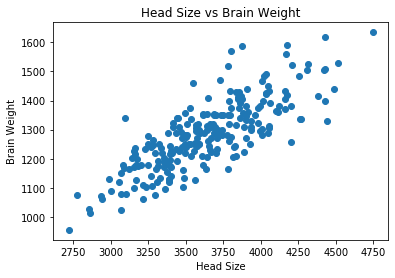

In [9]:
plt.scatter(x,y)
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.title("Head Size vs Brain Weight")

## Split the Dataset into training set and test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [11]:
x.shape

(237, 1)

In [12]:
x_train.shape

(189, 1)

## Option1 - Train the simple linear regression model on training set using scikit

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [14]:
coefficient = lr.coef_.round(2)
coefficient

array([0.25])

In [15]:
intercept = lr.intercept_.round(2)
intercept

389.6

In [16]:
print("The equation of our simple regression model is Brain Weight = {}xHead Size + {}".format(coefficient, intercept))

The equation of our simple regression model is Brain Weight = [0.25]xHead Size + 389.6


In [17]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([1317.33248376, 1378.65781197, 1155.9242199 , 1142.92325032,
       1167.20808029, 1197.13484046, 1303.10500761, 1347.99514787,
       1476.28773449, 1366.39274633, 1256.25245686, 1225.09919013,
       1476.28773449, 1216.75894549, 1335.97538354, 1226.81629932,
       1382.09203035, 1369.09106077, 1322.48381133, 1306.53922599,
       1297.21777611, 1276.1218632 , 1193.45532077, 1474.81592661,
       1246.93100697, 1409.56577739, 1191.24760895, 1213.32472711,
       1337.93779404, 1198.36134702, 1334.25827435, 1222.15557437,
       1308.99223912, 1236.1377492 , 1446.36097432, 1411.5281879 ,
       1277.10306845, 1554.04825067, 1163.77386191, 1330.33345334,
       1243.00618596, 1373.75178572, 1247.4216096 , 1139.73433325,
       1239.8172689 , 1243.00618596, 1287.89632622, 1219.45725993])

## Compare the (predicted) test set results with (given) y_test

In [18]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([1222.15557437, 1245.70450041, 1289.61343541, 1234.1753387 ,
       1280.53728683, 1254.04474504, 1269.25342644, 1398.77251963,
       1329.10694678, 1448.07808351, 1340.88140979, 1248.89341747,
       1269.98933038, 1372.27997784, 1213.81532973, 1282.49969733,
       1289.12283278, 1346.03273736, 1246.44040434, 1334.01297303,
       1340.39080717, 1298.19898136, 1267.78161856, 1316.59657982,
       1307.02982862, 1212.34352186, 1372.77058047, 1271.21583694,
       1432.86940212, 1301.14259711, 1318.0683877 , 1353.63707806,
       1414.22650234, 1261.89438705, 1223.87268356, 1147.58397526,
       1069.82345909, 1262.63029099, 1419.86843253, 1413.73589971,
       1092.14587856, 1322.72911264, 1292.31174985, 1474.5706253 ,
       1303.84091155, 1207.4374956 , 1327.6351389 , 1275.87656189,
       1165.98157373, 1227.30690194, 1379.63901723, 1320.0307982 ,
       1354.86358463, 1223.38208094, 1151.01819364, 1182.662063  ,
       1384.7903448 , 1284.46210784, 1204.73918116, 1247.42160

In [19]:
y_test_pred_rounded = [round (elem,2) for elem in y_test_pred.tolist()]
y_test_pred_rounded

[1317.33,
 1378.66,
 1155.92,
 1142.92,
 1167.21,
 1197.13,
 1303.11,
 1348.0,
 1476.29,
 1366.39,
 1256.25,
 1225.1,
 1476.29,
 1216.76,
 1335.98,
 1226.82,
 1382.09,
 1369.09,
 1322.48,
 1306.54,
 1297.22,
 1276.12,
 1193.46,
 1474.82,
 1246.93,
 1409.57,
 1191.25,
 1213.32,
 1337.94,
 1198.36,
 1334.26,
 1222.16,
 1308.99,
 1236.14,
 1446.36,
 1411.53,
 1277.1,
 1554.05,
 1163.77,
 1330.33,
 1243.01,
 1373.75,
 1247.42,
 1139.73,
 1239.82,
 1243.01,
 1287.9,
 1219.46]

In [20]:
x_test_rounded = [round (elem,2) for elem in x_test.flatten().tolist()]
x_test_rounded

[3782,
 4032,
 3124,
 3071,
 3170,
 3292,
 3724,
 3907,
 4430,
 3982,
 3533,
 3406,
 4430,
 3372,
 3858,
 3413,
 4046,
 3993,
 3803,
 3738,
 3700,
 3614,
 3277,
 4424,
 3495,
 4158,
 3268,
 3358,
 3866,
 3297,
 3851,
 3394,
 3748,
 3451,
 4308,
 4166,
 3618,
 4747,
 3156,
 3835,
 3479,
 4012,
 3497,
 3058,
 3466,
 3479,
 3662,
 3383]

In [21]:
data = {"x_test":x_test_rounded, "y_test":y_test,"y_test_predict":y_test_pred_rounded}
summary=pd.DataFrame(data)
summary

,x_test,y_test,y_test_predict
0,3782,1350,1317.33
1,4032,1425,1378.66
2,3124,1165,1155.92
3,3071,1078,1142.92
4,3170,1178,1167.21
5,3292,1075,1197.13
6,3724,1280,1303.11
7,3907,1440,1348.00
8,4430,1620,1476.29
9,3982,1375,1366.39


## Visualising the training set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

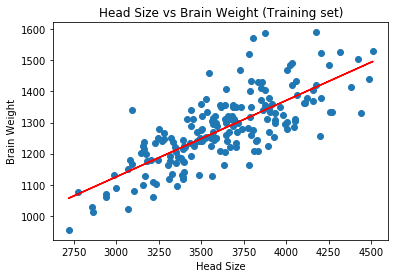

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color="red")
plt.title('Head Size vs Brain Weight (Training set)')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.tight_layout

## Visualise the test set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

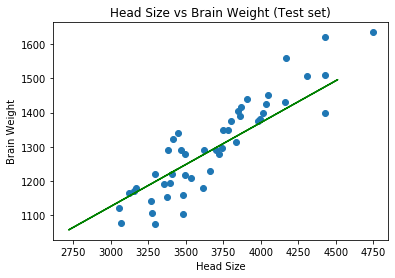

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Head Size vs Brain Weight (Test set)')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.tight_layout

## Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

74.22

In [26]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.58

## Option2 - Train the simple linear regression model on training set using statsmodel

In [27]:
import statsmodels.api as sm

In [28]:
original_data = pd.read_csv("headbrain.csv")
original_data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [29]:
X = original_data["Head Size(cm^3)"]
Y = original_data["Brain Weight(grams)"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 101)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.654
Model:                             OLS   Adj. R-squared:                  0.652
Method:                  Least Squares   F-statistic:                     353.3
Date:                 Sat, 10 Oct 2020   Prob (F-statistic):           5.88e-45
Time:                         09:56:06   Log-Likelihood:                -1077.7
No. Observations:                  189   AIC:                             2159.
Df Residuals:                      187   BIC:                             2166.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             305.5654     5